In [229]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os, operator, scipy, csv
import functions as f
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy import stats
from statsmodels.sandbox.stats import multicomp
from processing import getDocuments
from contexts import getnGrams
from gensim import corpora, models, similarities, matutils
from occurrences import *
from supervised import *
from unsupervised import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Topic 0: abbb_baaa baaa_baaa aaaa_abbb baaa_bbab bbbb_abbb
Topic 1: abbb_abbb bbbb_bbbb babb_aaaa abbb_baab baab_baba
Topic 2: abbb_bbbb abba_baaa aaba_bbbb abba_aaaa abaa_baaa
Topic 3: bbbb_aaaa aaaa_bbbb aaaa_aaaa bbbb_bbbb bbbb_abba
Topic 4: bbbb_bbab baaa_bbbb babb_bbbb bbbb_baaa aaba_baaa


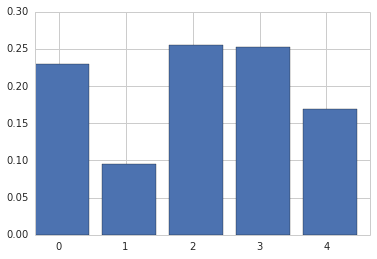

In [178]:
path = 'texts/multiple_sites_full_2letter/NYU/AD_2'

letters = ['b','c']
textNames = sorted([os.path.join(path, fn) for fn in os.listdir(path)])

scripts = sorted([os.path.join(path, fn) for fn in os.listdir(path)])
for script in scripts:
    if '.DS_Store' in script:
        scripts.remove(script)

# for LDA
runLDA = True # whether to run LDA
delimiter = 'none' #or ',' type of delimiter between your words in the document
nTopics = 5 # number of topics to create
nWords = 6 #4 # number of top words to return per topic; is actually n - 1 (so 3 for 2 words)
nIters = 1000 # number of iterations for sampling

documents = getDocuments(scripts, delimiter, False, textNames)

AD_topics, AD_topicProbs, AD_indivProbs, AD_featureNames, dtm  = ldaModel(scripts,nTopics,nIters,nWords,documents) # run LDA to get topics

fig, ax = plt.subplots()
index = np.arange(len(AD_topicProbs))
ax.bar(index,AD_topicProbs) #s=20 should be abstracted to number of words in topics
bar_width = 0.35
plt.xticks(index + bar_width, (map(str,range(nTopics))))
plt.show()


Topic 0: baaa_abbb aaaa_baaa bbbb_abbb baab_baaa abbb_abaa
Topic 1: baaa_baaa aaaa_aaaa baaa_baab abba_bbbb baab_bbbb
Topic 2: aaaa_bbbb baaa_bbbb bbbb_aaba abbb_aabb baba_aaaa
Topic 3: bbab_bbab abba_abba bbbb_baaa bbab_bbbb baaa_bbab
Topic 4: abbb_abbb abba_aaba abba_baaa bbab_aaaa bbbb_bbab


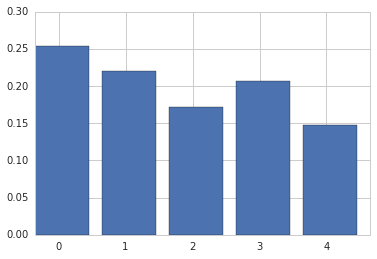

In [179]:
path = 'texts/multiple_sites_full_2letter/NYU/TD_2'

letters = ['b','c']
textNames = sorted([os.path.join(path, fn) for fn in os.listdir(path)])

scripts = sorted([os.path.join(path, fn) for fn in os.listdir(path)])
for script in scripts:
    if '.DS_Store' in script:
        scripts.remove(script)

# for LDA
delimiter = 'none' #or ',' type of delimiter between your words in the document
nTopics = 5 # number of topics to create
nWords = 6 #4 # number of top words to return per topic; is actually n - 1 (so 3 for 2 words)
nIters = 1000 # number of iterations for sampling

documents = getDocuments(scripts, delimiter, False, textNames)

TD_topics, TD_topicProbs, TD_indivProbs, TD_featureNames, dtm  = ldaModel(scripts,nTopics,nIters,nWords,documents) # run LDA to get topics

fig, ax = plt.subplots()
index = np.arange(len(TD_topicProbs))
ax.bar(index,TD_topicProbs) #s=20 should be abstracted to number of words in topics
bar_width = 0.35
plt.xticks(index + bar_width, (map(str,range(nTopics))))
plt.show()


Topic 0: aaaa_aaaa baaa_aaaa bbbb_aaba abaa_abbb bbab_bbab bbab_abbb abba_bbbb abbb_abba abbb_baba abbb_bbbb
Topic 1: baaa_baaa baaa_abbb aaba_bbbb bbbb_baaa abaa_baaa aaaa_abbb abba_abbb baaa_abba bbbb_baab baaa_aaba
Topic 2: babb_abaa bbbb_aaab aaab_abaa babb_bbbb bbbb_abba aabb_bbab abbb_abaa aabb_baab aabb_bbbb baba_aaab
Topic 3: aaaa_bbbb abbb_baaa baaa_bbbb baaa_bbab abbb_abbb bbab_aaaa baaa_abaa bbab_aaba aaaa_bbab abab_abbb
Topic 4: baab_baaa abbb_abaa abba_baab baab_abba aaaa_baaa abba_aaba abaa_abba abbb_aabb abba_babb aaaa_baab
Topic 5: abbb_abbb baba_bbab bbab_baba bbba_baba baba_abaa aaaa_baba babb_baba aaab_baab baba_abbb abaa_baba
Topic 6: bbbb_bbbb bbbb_aaaa baaa_baab baab_baab bbab_bbbb bbbb_abba baba_baaa baab_aaba aaaa_babb aaba_aaaa
texts/multiple_sites_full_2letter/NYU/both/AD_10_2.txt (top topic: 3)
texts/multiple_sites_full_2letter/NYU/both/AD_11_2.txt (top topic: 3)
texts/multiple_sites_full_2letter/NYU/both/AD_12_2.txt (top topic: 3)
texts/multiple_sites_full_2

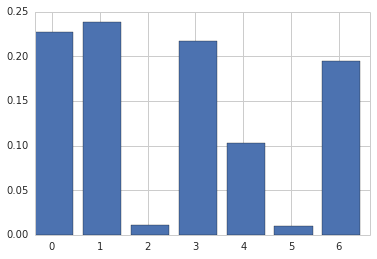

In [260]:
path = 'texts/multiple_sites_full_2letter/NYU/both'

letters = ['b','c']
textNames = sorted([os.path.join(path, fn) for fn in os.listdir(path)])

scripts = sorted([os.path.join(path, fn) for fn in os.listdir(path)])
for script in scripts:
    if '.DS_Store' in script:
        scripts.remove(script)

# for LDA
delimiter = 'none' #or ',' type of delimiter between your words in the document
nTopics = 7 #7 is best so far at 65% enet class with all topics # number of topics to create
# NEED MORE ROBUST MEASURE OF HOW MANY WORDS IM USING IN MY TOPIC COMPARISON
nWords = 11#27 #4 # number of top words to return per topic; is actually n - 1 (so 3 for 2 words)
nIters = 1000 # number of iterations for sampling

documents = getDocuments(scripts, delimiter, False, textNames)

topics, topicProbs, indivProbs, featureNames, dtm  = ldaModel(scripts,nTopics,nIters,nWords,documents) # run LDA to get topics

fig, ax = plt.subplots()
index = np.arange(len(topicProbs))
ax.bar(index,topicProbs) #s=20 should be abstracted to number of words in topics
bar_width = 0.35
plt.xticks(index + bar_width, (map(str,range(nTopics))))
plt.show()

In [261]:
topic_nums = range(nTopics)

topic_counts = {'topic':[],'group':[],'count':[]}

#print melted

# feats, melted = countFeatures(topics[0].tolist())
# print melted

pvals = []
for topic in topic_nums:
    
    feats, melted = countFeatures(topics[topic].tolist())
    topic_counts['topic'].append(topic)
    topic_counts['topic'].append(topic)
    topic_counts['group'].append('AD')
    topic_counts['group'].append('TD')
    topic_counts['count'].append(melted[melted['group'] == 'AD']['value'].mean())
    topic_counts['count'].append(melted[melted['group'] == 'TD']['value'].mean())
    
    pvals.append(stats.ttest_ind(melted[melted['group'] == 'AD']['value'],melted[melted['group'] == 'TD']['value'])[1])

corrected_contrasts = multicomp.multipletests(pvals, alpha=0.05,method='fdr_bh')
print corrected_contrasts

topic_count_df = pd.DataFrame.from_dict(topic_counts)
    

(array([False, False, False,  True,  True,  True,  True], dtype=bool), array([ 0.87702688,  0.89440966,  0.19959079,  0.03416847,  0.00200058,
        0.00367202,  0.00367202]), 0.0073008319790146547, 0.0071428571428571435)


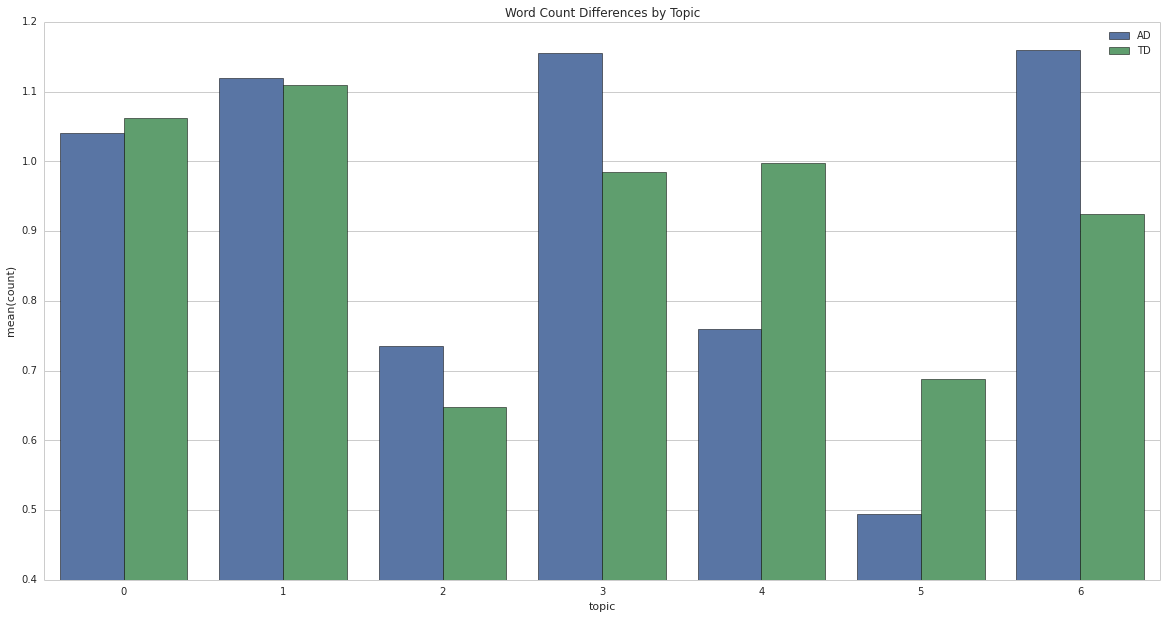

In [270]:
sns.set_style("whitegrid")
sns.plt.figure(figsize=(20,10))
sns.barplot(data=topic_count_df,x='topic',y='count',hue='group',linewidth=0.5)
title = "Word Count Differences by Topic"
plt.ylim(0.4,1.2)
sns.plt.title(title)
plt.legend();

In [181]:
#Topic 0: baaa_abbb aaaa_baaa bbbb_abbb baab_baaa abbb_abaa

dtm, reducedDocuments, vocab = bagOfWords(scripts, documents, True, 1, False, False)

textList = []
for text in scripts:
    textList.append(reducedDocuments[text])
    #textList.append(documents[text])

dictionary = corpora.Dictionary(textList)
corpus = [dictionary.doc2bow(text) for text in textList]

# lda = models.ldamodel.LdaModel(corpus=corpus,
#     id2word=dictionary,num_topics=5,iterations=500000,passes=10)
lda = models.ldamodel.LdaModel(corpus=corpus,
    id2word=dictionary,num_topics=5,iterations=10000,passes=10)

# lda.show_topics()
# lda.print_topic(1)
#lda.show_topics()
#lda.top_topics(corpus,num_words=10)


including bigrams in vocabulary



In [182]:
#%%capture

def symmetric_kl(p,q):
    return np.sum([stats.entropy(p,q),stats.entropy(q,p)])

def arun_measure(min_topics,max_topics,step):
    kl = []

    dtm, reducedDocuments, vocab = bagOfWords(scripts, documents, True, 1, False, False)

    textList = []
    for text in scripts:
        textList.append(reducedDocuments[text])
        #textList.append(documents[text])

    dictionary = corpora.Dictionary(textList)
    corpus = [dictionary.doc2bow(text) for text in textList]
        
    for i in range(min_topics, max_topics, step):
        lda = models.ldamodel.LdaModel(corpus=corpus,
            id2word=dictionary,num_topics=i,iterations=10,passes=1) #1000, 10
        m1 = lda.expElogbeta
        U,cm1,V = np.linalg.svd(m1)
        #Document-topic matrix
        lda_topics = lda[corpus]
        m2 = matutils.corpus2dense(lda_topics, lda.num_topics).transpose()
        l = len(corpus)
        cm2 = np.dot([l]*l,m2)
        cm2 = cm2 + 0.0001
        cm2norm = np.linalg.norm(l)
        cm2 = cm2/cm2norm
        kl.append(symmetric_kl(cm1,cm2))
    return kl

#kl = arun_measure(min_topics=1,max_topics=50,step=1)
# kl_vals = []
# for i in range(10):
#     kl = arun_measure(min_topics=1,max_topics=50,step=1)
#     kl_vals.append(np.asarray(kl))

# kl_mean = np.mean(np.asarray(kl_vals),axis=0)



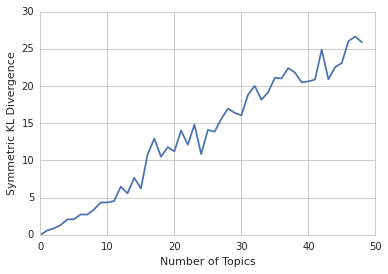

In [140]:
#kl = arun_measure(min_topics=1,max_topics=50,step=1)
#plt.plot(kl)
plt.plot(kl_mean)
plt.ylabel('Symmetric KL Divergence')
plt.xlabel('Number of Topics')
plt.show()

In [72]:
from feature_functions import countFeatures, drop_features, wordFrequency

top_features = drop_features(26)
reduced_feat = []
for gram in top_features:
    #if (word[0] == 'a' and word[3] == 'b'): #or (word[5] == 'a' and word[8] == 'b'):
        reduced_feat.append(gram)

top_features = reduced_feat
summed_feats, melted_df = countFeatures(top_features)



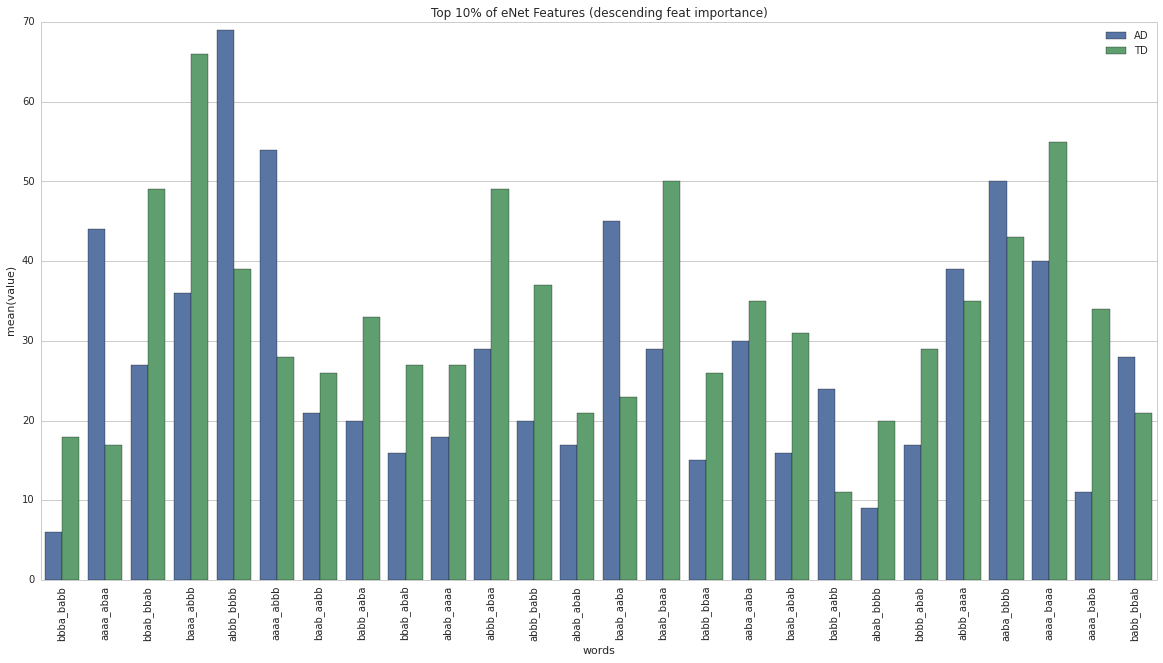

In [31]:
sns.set_style("whitegrid")
sns.plt.figure(figsize=(20,10))
sns.barplot(data=summed_feats,x='words',y='value',hue='variable')
plt.xticks(rotation=90);
sns.plt.title("Top 10% of eNet Features (descending feat importance)")
plt.legend();

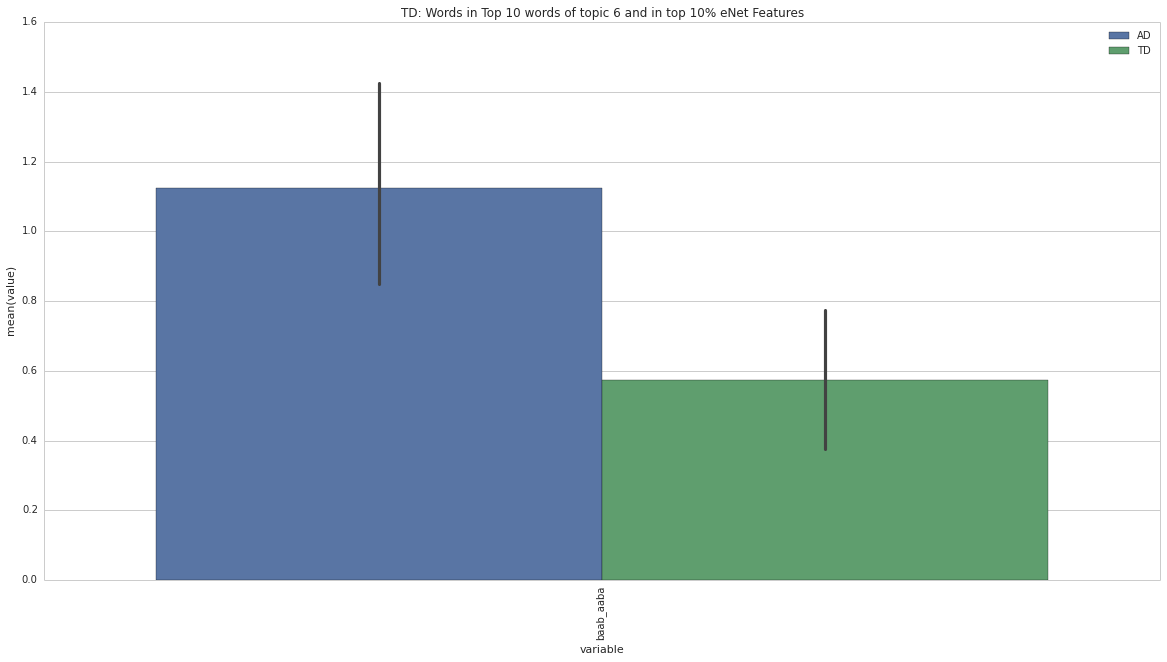

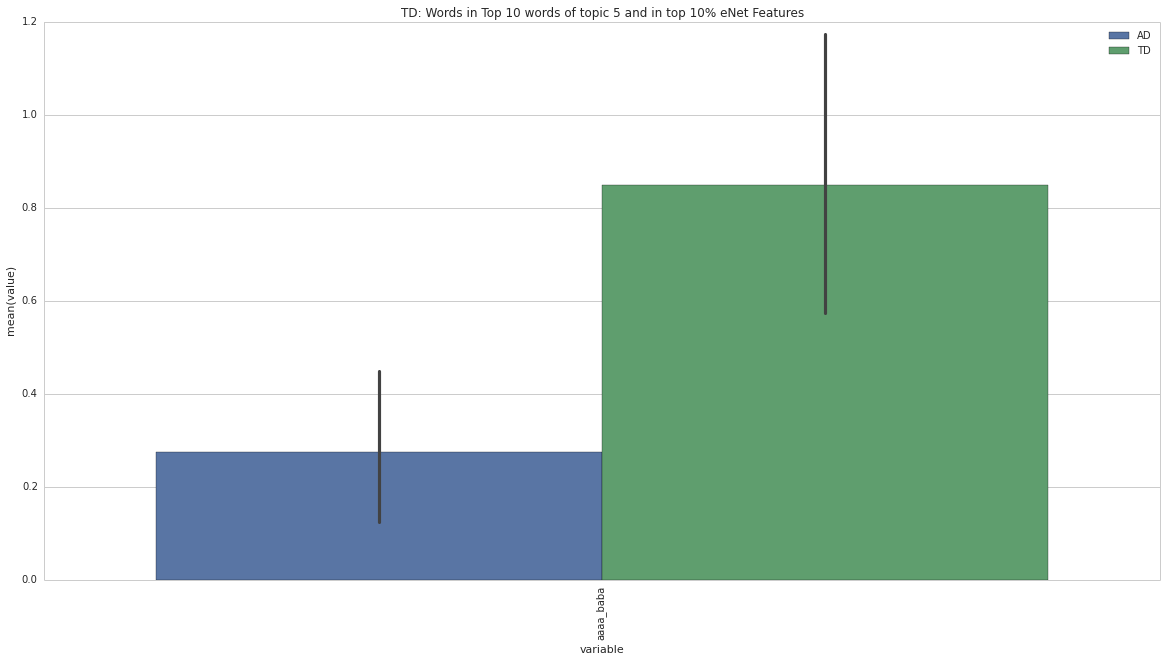

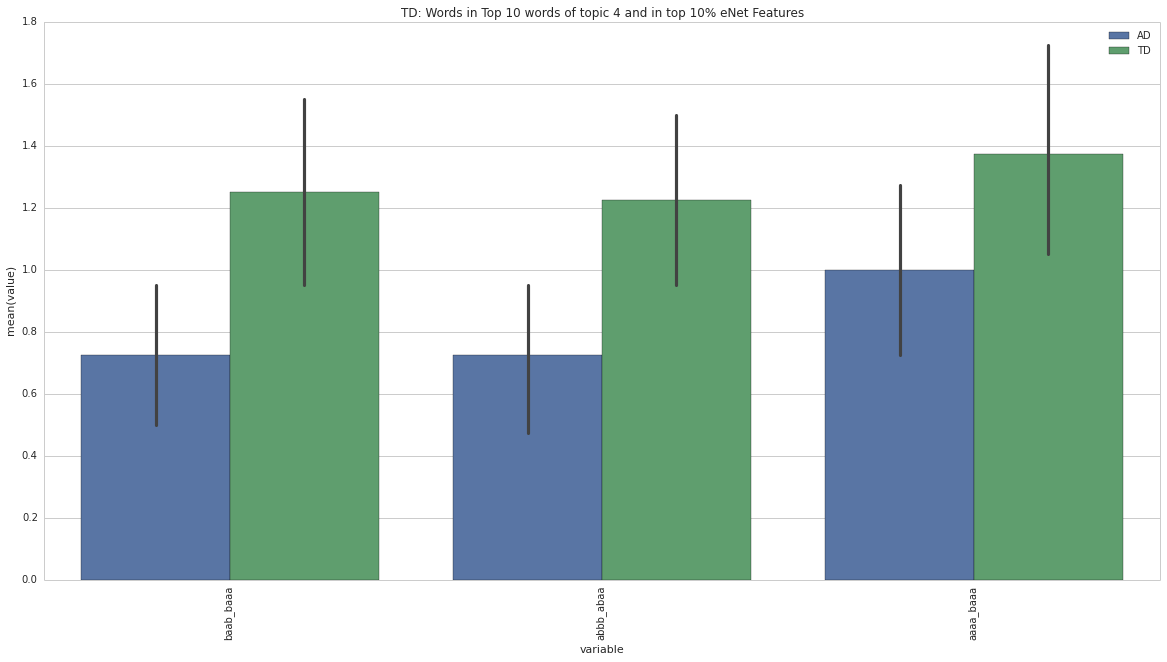

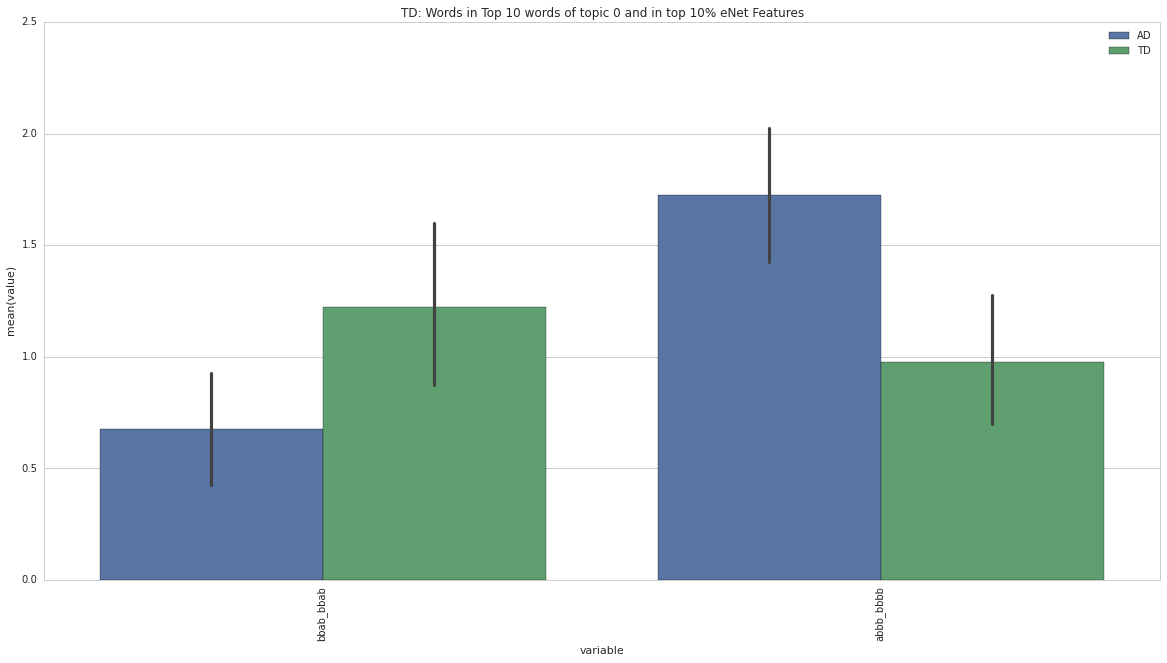

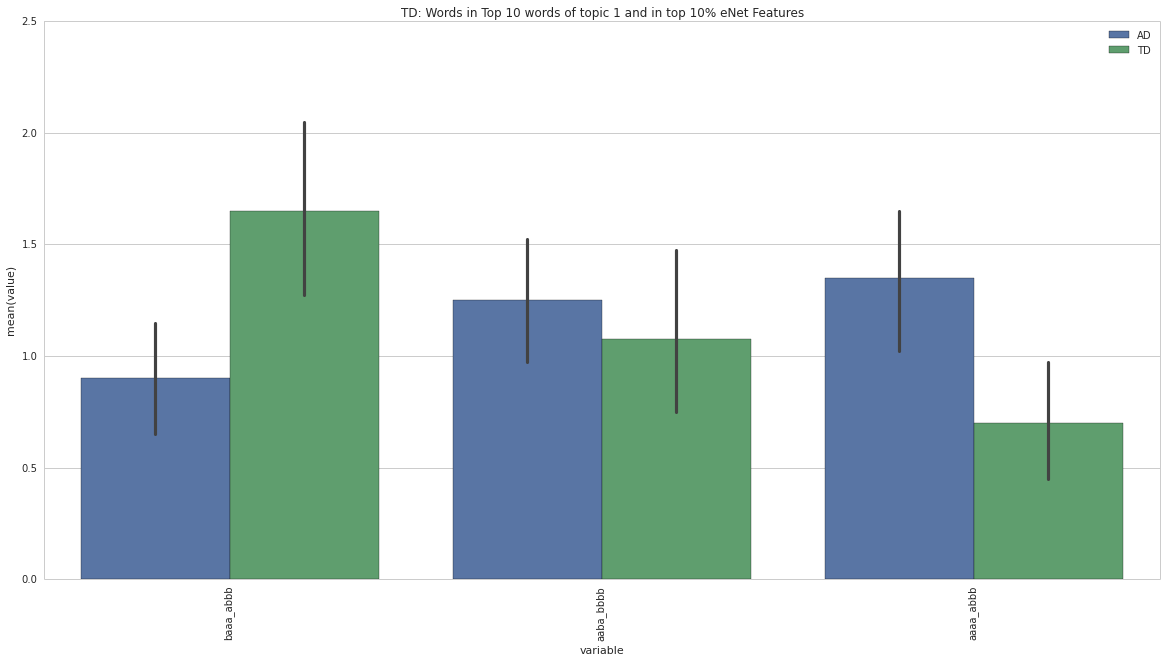

In [274]:
top_topics = [6, 5, 4, 0, 1]#[0, 1, 3, 2, 4, 5, 6]

for topic in top_topics:
    topic_words = []
    for word in topics[topic]:
        if word in top_features:
            topic_words.append(melted_df[melted_df['variable'] == word])
        
    topic_df = pd.concat(topic_words)
    sns.set_style("whitegrid")
    sns.plt.figure(figsize=(20,10))
    sns.barplot(data=topic_df,x='variable',y='value',hue='group')
    plt.xticks(rotation=90);
    title = "TD: Words in Top 10 words of topic %s and in top 10%% eNet Features"%(str(topic))
    sns.plt.title(title)
    plt.legend();
    


[u'abbb_bbbb' u'abba_baaa' u'aaba_bbbb' u'abba_aaaa' u'abaa_baaa']
[u'bbbb_aaaa' u'aaaa_bbbb' u'aaaa_aaaa' u'bbbb_bbbb' u'bbbb_abba']


ValueError: No objects to concatenate

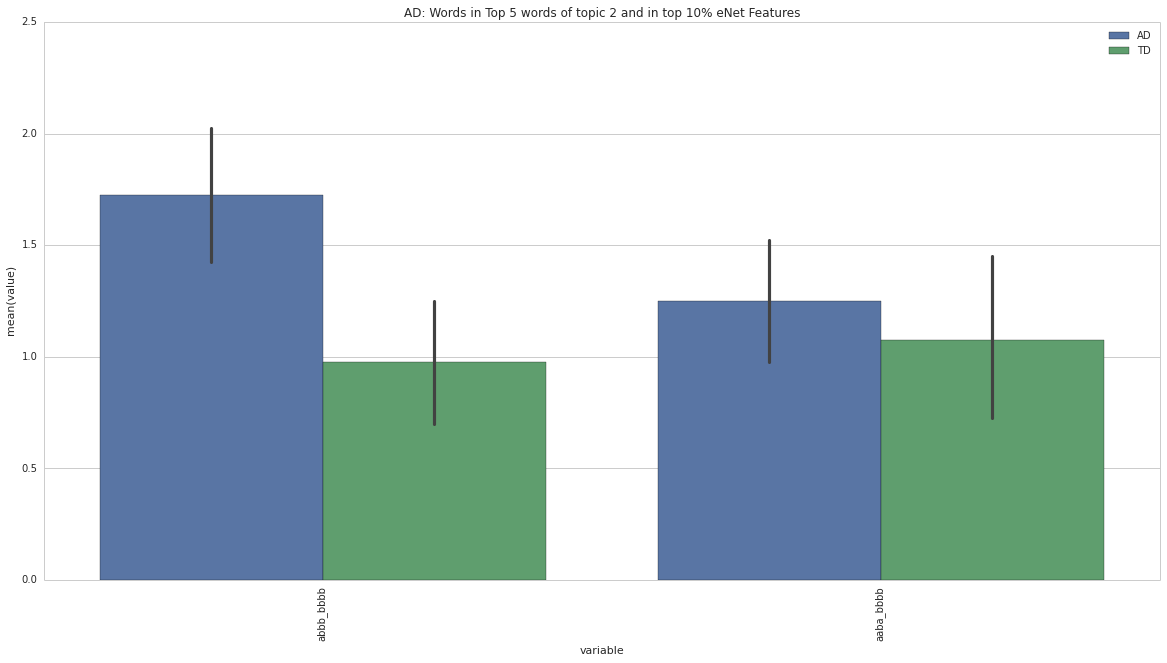

In [135]:
#AD_top_topics = [17, 13, 10, 6]
#AD_top_topics = [2, 3, 0, 4, 1]

for topic in AD_top_topics:
    print AD_topics[topic]
    topic_words = []
    for word in AD_topics[topic]:
        if word in top_features:
            topic_words.append(melted_df[melted_df['variable'] == word])

    topic_df = pd.concat(topic_words)
    sns.set_style("whitegrid")
    sns.plt.figure(figsize=(20,10))
    sns.barplot(data=topic_df,x='variable',y='value',hue='group')
    plt.xticks(rotation=90);
    title = "AD: Words in Top 5 words of topic %s and in top 10%% eNet Features"%(str(topic))
    sns.plt.title(title)
    plt.legend();


ValueError: No objects to concatenate

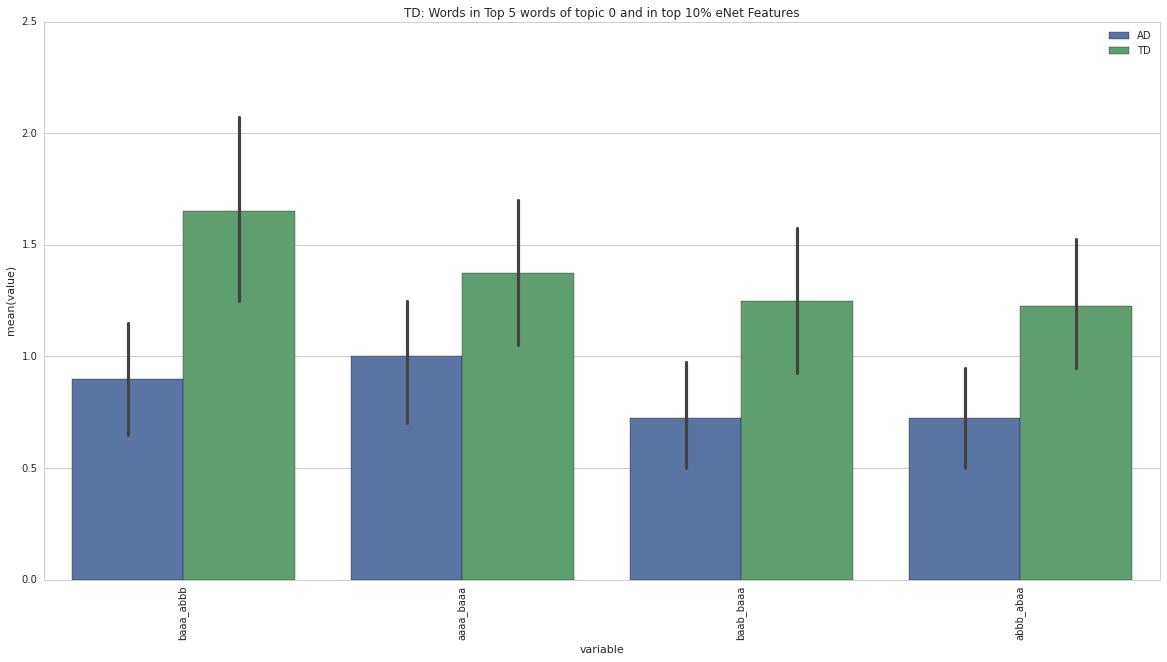

In [134]:
#TD_top_topics = [10, 5, 2, 17, 8]
#TD_top_topics = [10, 5, 2, 8] #after 5000 iters
TD_top_topics = [0, 1, 3, 2, 4]

for topic in TD_top_topics:
    topic_words = []
    for word in TD_topics[topic]:
        if word in top_features:
            topic_words.append(melted_df[melted_df['variable'] == word])

    topic_df = pd.concat(topic_words)
    sns.set_style("whitegrid")
    sns.plt.figure(figsize=(20,10))
    sns.barplot(data=topic_df,x='variable',y='value',hue='group')
    plt.xticks(rotation=90);
    title = "TD: Words in Top 5 words of topic %s and in top 10%% eNet Features"%(str(topic))
    sns.plt.title(title)
    plt.legend();
    
    #AD Top Topic 2: abbb_bbbb abba_baaa aaba_bbbb abba_aaaa abaa_baaa
    #AD Top Topic 3: bbbb_aaaa aaaa_bbbb aaaa_aaaa bbbb_bbbb bbbb_abba
    #TD Top Topic 0: baaa_abbb aaaa_baaa bbbb_abbb baab_baaa abbb_abaa # DMN topic: Each bigram has an anticorr DMN
    #TD Top Topic 1: baaa_baaa aaaa_aaaa baaa_baab abba_bbbb baab_bbbb # 

